# The Data Incubator Project

My project aims to look at the correlation between AirBnB occupancy in the city of San Fransisco and the number of incidents reported by the police of the city.
I belive the AirBnB occupancy rate can be used as a proxy to the number of tourists present in the city.
Logically, the more tourists are present, the more crime should occur.
I wish to explore if this correlation exists and if it does we can explore how the different type of crime relate to the occupancy type and if this phenomenon is similar in a less touristy city such as Oakland. We can also investigate if the relation changer in regards to the type of Airbnb client (cheap vs expensive room, single room vs whole house, long vs short stays)
If we find strong correlations we can try to predict future number of incidents in function of the reservations made on AirBnb.

I downloaded the AirBnB data from : http://insideairbnb.com/get-the-data.html
I downloaded all the data concerning year 2018 for San Fransisco. The idea was to use information as close to the scraping date as possible.

Data about police reports for San Fransisco can be found at:
https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783

## Libraries

In [1]:
library(plyr)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date



## Import and Reshape Airbnb Data

In [5]:
getwd()

[1] "/Users/laura/Documents/TDI_project"

In [8]:
calendar171207 <- read.csv("calendar171207.csv")
calendar180110 <- read.csv("calendar180110.csv")
calendar180117 <- read.csv("calendar180117.csv")
calendar180202 <- read.csv("calendar180202.csv")
calendar180304 <- read.csv("calendar180304.csv")
calendar180406 <- read.csv("calendar180406.csv")
calendar180509 <- read.csv("calendar180509.csv")
calendar180705 <- read.csv("calendar180705.csv")
calendar180806 <- read.csv("calendar180806.csv")
calendar180908 <- read.csv("calendar180908.csv")
calendar181003 <- read.csv("calendar181003.csv")
calendar181103 <- read.csv("calendar181103.csv")
calendar181206 <- read.csv("calendar181206.csv")

We now need to select part of each dataset (before the next scrap date which is the beginning of the next dataset)

In [15]:
d01a<- as.Date("2018-01-01")
d01b<- as.Date("2018-01-09")
d02a<- as.Date("2018-01-10")
d02b<- as.Date("2018-01-16")
d03a<- as.Date("2018-01-17")
d03b<- as.Date("2018-02-01")
d04a<- as.Date("2018-02-02")
d04b<- as.Date("2018-03-03")
d05a<- as.Date("2018-03-04")
d05b<- as.Date("2018-04-05")
d06a<- as.Date("2018-04-06")
d06b<- as.Date("2018-05-08")
d07a<- as.Date("2018-05-09")
d07b<- as.Date("2018-07-05")
d08a<- as.Date("2018-07-06")
d08b<- as.Date("2018-08-05")
d09a<- as.Date("2018-08-06")
d09b<- as.Date("2018-09-07")
d10a<- as.Date("2018-09-08")
d10b<- as.Date("2018-10-02")
d11a<- as.Date("2018-10-03")
d11b<- as.Date("2018-11-02")
d12a<- as.Date("2018-11-03")
d12b<- as.Date("2018-12-05")
d13a<- as.Date("2018-12-06")
d13b<- as.Date("2018-12-31")

In [16]:
cal1 <- calendar171207[as.Date(calendar171207$date) %in% d01a:d01b, ]
cal2 <- calendar180110[as.Date(calendar180110$date) %in% d02a:d02b, ]
cal3 <- calendar180117[as.Date(calendar180117$date) %in% d03a:d03b, ]
cal4 <- calendar180202[as.Date(calendar180202$date) %in% d04a:d04b, ]
cal5 <- calendar180304[as.Date(calendar180304$date) %in% d05a:d05b, ]
cal6 <- calendar180406[as.Date(calendar180406$date) %in% d06a:d06b, ]
cal7 <- calendar180509[as.Date(calendar180509$date) %in% d07a:d07b, ]
cal8 <- calendar180705[as.Date(calendar180705$date) %in% d08a:d08b, ]
cal9 <- calendar180806[as.Date(calendar180806$date) %in% d09a:d09b, ]
cal10 <- calendar180908[as.Date(calendar180908$date) %in% d10a:d10b, ]
cal11 <- calendar181003[as.Date(calendar181003$date) %in% d11a:d11b, ]
cal12 <- calendar181103[as.Date(calendar181103$date) %in% d12a:d12b, ]
cal13 <- calendar181206[as.Date(calendar181206$date) %in% d13a:d13b, ]

allcal <- rbind(cal1, cal2, cal3, cal4, cal5, cal6, cal7, 
              cal8, cal9, cal10, cal11, cal12, cal13)

We count how mainy items are free or busy for each day and reshape the data.

In [17]:
av.bnb <- count(allcal, c("date", "available"))
av.bnb.long <- reshape(av.bnb,
                       timevar = "available",
                       idvar = c("date"),
                       direction = "wide")
colnames(av.bnb.long) <- c("date", "busy","empty")

We now create a column with the occupancy rate for each day of the year.

In [18]:
av.bnb.long$occupancy <- unlist(av.bnb.long["busy"]/(av.bnb.long["busy"] + av.bnb.long["empty"]),
                                use.names = FALSE)
colnames(av.bnb.long) <- c("date", "busy","empty", "occupancy")


We now aggregate the data per week

In [19]:
bnb.busy.week <- tapply(av.bnb.long$busy,
               week(av.bnb.long$date),
               sum)

bnb.empty.week <- tapply(av.bnb.long$empty,
                        week(av.bnb.long$date),
                        sum)

bnb.week <- data.frame(bnb.busy.week, bnb.empty.week)
bnb.week$occupancy <- bnb.week["bnb.busy.week"] / (bnb.week["bnb.busy.week"] + bnb.week["bnb.empty.week"])
bnb.week$week <- as.numeric(names(bnb.busy.week))
colnames(bnb.week) <- c("busy","empty", "occupancy", "week")

## Import and Reshape Police Data

In [3]:
police <- read.csv("police.csv")

Select the data from 2018.

In [10]:
mypolice <-police[ , c("Row.ID", "Incident.Date", "Incident.Category")]
mypolice$Incident.Date <- as.Date(mypolice$Incident.Date)
dp1 <- as.Date("2018-01-01")
dp2 <- as.Date("2018-12-31")

pol2018 <- mypolice[mypolice$Incident.Date %in% dp1:dp2, ]

We count how mainy incidents there are for each day and reshape the data.

In [11]:
pol.inc <- count(pol2018, c("Incident.Date", "Incident.Category"))
pol.inc.long <- reshape(pol.inc,
                       timevar = "Incident.Category",
                       idvar = c("Incident.Date"),
                       direction = "wide")

We replace the "NA" by the value 0 and create a column with the sum of all incidents of different types.

In [12]:
pol.inc.long[is.na(pol.inc.long)] <- 0
pol.inc.long$total <- apply(as.matrix(pol.inc.long[ , -1]), 1, sum)

We aggregate the data to get weekly counts (Total, Burglar, and Assault).

In [14]:
pol.inc.long.week <- tapply(pol.inc.long$total,
                         week(pol.inc.long$Incident.Date),
                         sum)


pol.bur.week <- tapply(pol.inc.long$freq.Burglary,
                            week(pol.inc.long$Incident.Date),
                            sum)

pol.ass.week <- tapply(pol.inc.long$freq.Assault,
                       week(pol.inc.long$Incident.Date),
                       sum)

## The Plots and Models

We first explore the correlation between the total number of incidents and the occupancy rate of AirBnb. We look at the daily data and the weekly aggregated data.

In [20]:
mod.day <- lm(pol.inc.long$total ~ av.bnb.long$occupancy)
mod.week <- lm(pol.inc.long.week ~ unlist(bnb.week$occupancy))

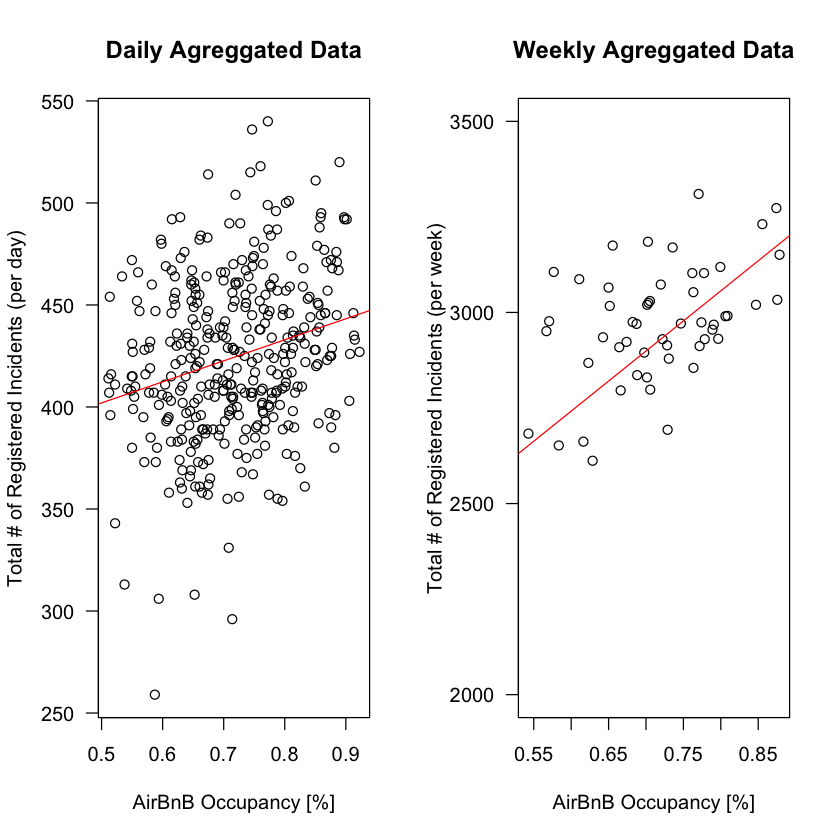

In [34]:
par(mfrow=c(1,2))
plot(pol.inc.long$total ~ av.bnb.long$occupancy,
     xlab = "AirBnB Occupancy [%]",
     ylab = "Total # of Registered Incidents (per day)",
     main = "Daily Agreggated Data",
     las=1)
abline(a=coef(mod.day)[1],
       b=coef(mod.day)[2],
       col=2)

plot(pol.inc.long.week ~ unlist(bnb.week$occupancy),
     xlab = "AirBnB Occupancy [%]",
     ylab = "Total # of Registered Incidents (per week)",
     ylim = c(2000,3500),
     main = "Weekly Agreggated Data",
     las=1)
abline(a=coef(mod.week)[1],
       b=coef(mod.week)[2],
       col=2)

We observe a positive correlation (statistically significant)

In [24]:
# summary(mod.day)
# summary(mod.week)

We now investigate the same correlation if we look at two incidents in particular: burglary and assault.
The idea would be that the number of assaults may increase (tourists are easier preys) but the number of burglaries should decrease (the homes are occupied not empty). Let's check!

## Assault and Burglary Plots

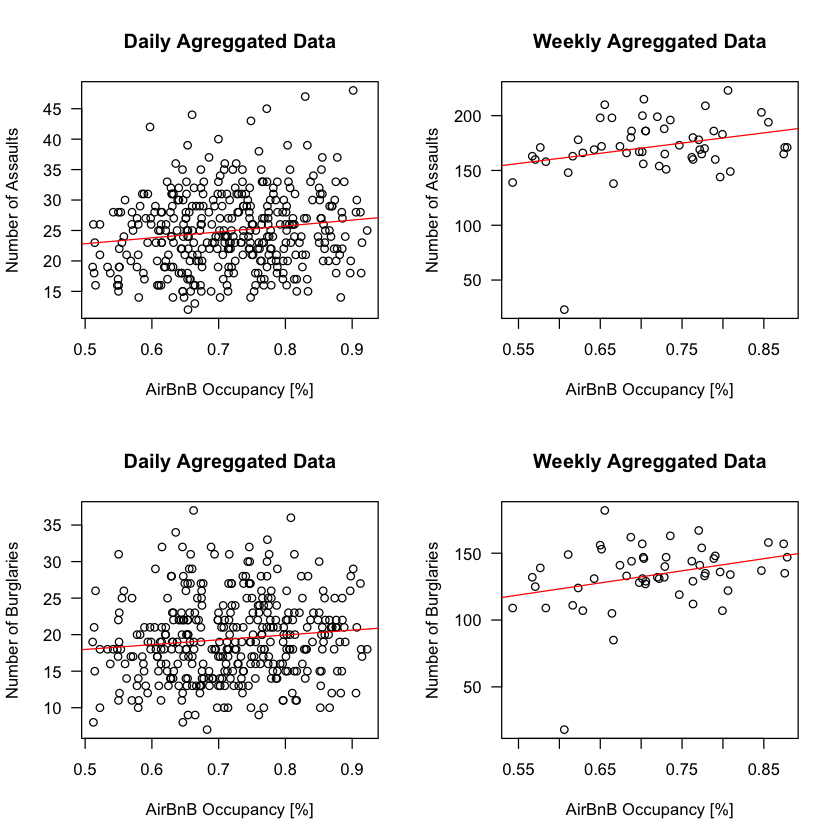

In [41]:
par(mfrow = c(2,2))
mod.ass.day <- lm(pol.inc.long$freq.Assault ~ av.bnb.long$occupancy)
plot(pol.inc.long$freq.Assault ~ av.bnb.long$occupancy,
     xlab = "AirBnB Occupancy [%]",
     ylab = "Number of Assaults",
     main = "Daily Agreggated Data",
     las=1)
abline(a=coef(mod.ass.day)[1],
       b=coef(mod.ass.day)[2],
       col=2)

mod.ass.w <- lm(pol.ass.week ~ unlist(bnb.week$occupancy))
plot(pol.ass.week ~ unlist(bnb.week$occupancy),
     xlab = "AirBnB Occupancy [%]",
     ylab = "Number of Assaults",
     # ylim = c(2000,3500),
     main = "Weekly Agreggated Data",
     las=1)
abline(a=coef(mod.ass.w)[1],
       b=coef(mod.ass.w)[2],
       col=2)

mod.burg.day <- lm(pol.inc.long$freq.Burglary ~ av.bnb.long$occupancy)
plot(pol.inc.long$freq.Burglary ~ av.bnb.long$occupancy,
     xlab = "AirBnB Occupancy [%]",
     ylab = "Number of Burglaries",
     main = "Daily Agreggated Data",
     las=1)
abline(a=coef(mod.burg.day)[1],
       b=coef(mod.burg.day)[2],
       col=2)

mod.bur.w <- lm(pol.bur.week ~ unlist(bnb.week$occupancy))
plot(pol.bur.week ~ unlist(bnb.week$occupancy),
     xlab = "AirBnB Occupancy [%]",
     ylab = "Number of Burglaries",
     # ylim = c(2000,3500),
     main = "Weekly Agreggated Data",
     las=1)
abline(a=coef(mod.bur.w)[1],
       b=coef(mod.bur.w)[2],
       col=2)

We observe a positive trend in both cases although the slope for burglary regression is not as steep as that for assault although the effect is not as strong when we look at weekly aggregated data.

In [37]:
coef(mod.burg.day)[2]
coef(mod.ass.day)[2]

av.bnb.long$occupancy 
             6.621429

av.bnb.long$occupancy 
             9.736101

In [40]:
coef(mod.bur.w)[2]
coef(mod.ass.w)[2]

unlist(bnb.week$occupancy) 
                  90.64214

unlist(bnb.week$occupancy) 
                   93.2469

## To be continued...